In [1]:
#Import the Libraries and dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import seaborn as sns
from fbprophet import Prophet
from datetime import datetime

In [2]:
dataset_df = pd.read_csv('atlantic.csv',error_bad_lines=False)


dataset_df

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
5,AL011851,UNNAMED,18510626,0,,HU,28.2N,97.0W,70,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
6,AL011851,UNNAMED,18510626,600,,TS,28.3N,97.6W,60,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
7,AL011851,UNNAMED,18510626,1200,,TS,28.4N,98.3W,60,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
8,AL011851,UNNAMED,18510626,1800,,TS,28.6N,98.9W,50,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
9,AL011851,UNNAMED,18510627,0,,TS,29.0N,99.4W,50,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [3]:
dataset_df.drop(['ID','Name', 'Time' , 'Event' , 'Latitude', 'Maximum Wind', 'Minimum Pressure','Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW' , 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW' ,'Longitude' , 'Low Wind NE' ,'Low Wind SE'], inplace=True ,axis = 1)


In [4]:
dataset_df['Date']=pd.to_datetime(dataset_df['Date'].astype(str), format='%Y/%m/%d')
dataset_df['Date'] = dataset_df["Date"].apply(str)

type(dataset_df["Date"][0])

str

In [5]:
dataset_df

,Date,Status
0,1851-06-25 00:00:00,HU
1,1851-06-25 00:00:00,HU
2,1851-06-25 00:00:00,HU
3,1851-06-25 00:00:00,HU
4,1851-06-25 00:00:00,HU
5,1851-06-26 00:00:00,HU
6,1851-06-26 00:00:00,TS
7,1851-06-26 00:00:00,TS
8,1851-06-26 00:00:00,TS
9,1851-06-27 00:00:00,TS


In [6]:
dataset_df['Status'].value_counts()


 TS    17804
 HU    14537
 TD     9891
 EX     4798
 LO     1005
 SS      557
 SD      293
 WV      116
 DB      104
Name: Status, dtype: int64

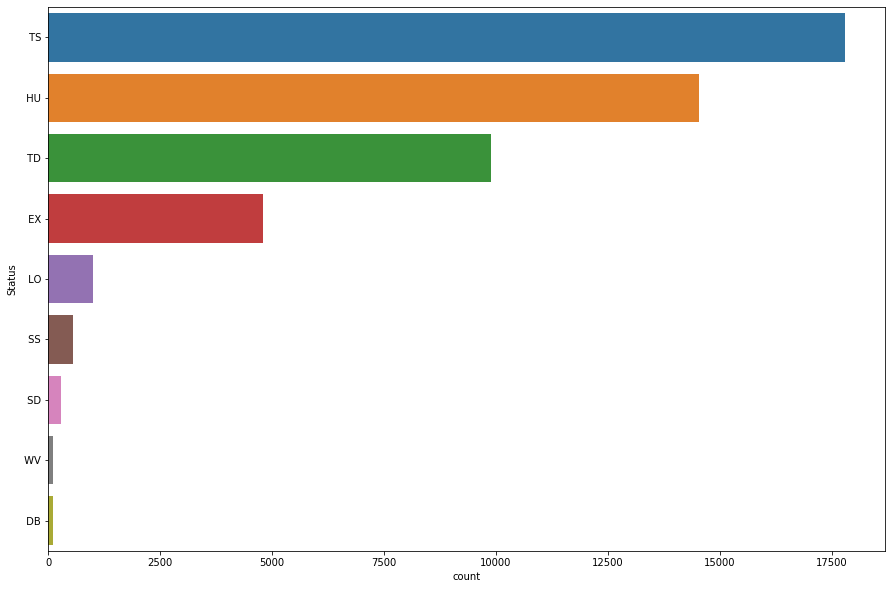

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(y = 'Status' , data = dataset_df, order = dataset_df['Status'].value_counts().iloc[:15].index)

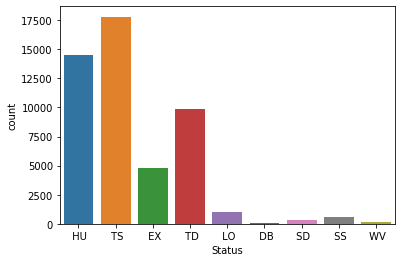

In [8]:
sns.countplot(x = 'Status' ,data = dataset_df)

In [9]:

dataset_df.index = pd.DatetimeIndex(dataset_df.Date)



In [26]:
dataset_df.resample('Y').size()



Date
1851-12-31     98
1852-12-31    134
1853-12-31    100
1854-12-31     60
1855-12-31     35
             ... 
2011-12-31    557
2012-12-31    654
2013-12-31    346
2014-12-31    300
2015-12-31    339
Freq: A-DEC, Length: 165, dtype: int64

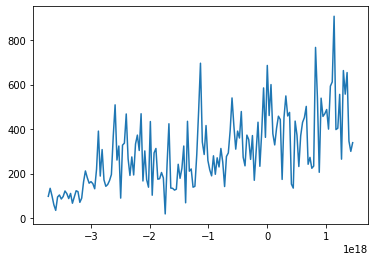

In [11]:
plt.plot(dataset_df.resample('Y').size())

In [12]:
dataset_prophet = dataset_df.resample('M').size().reset_index()



str

In [13]:
dataset_prophet

,Date,0
0,1851-06-30,14
1,1851-07-31,2
2,1851-08-31,49
3,1851-09-30,16
4,1851-10-31,17
5,1851-11-30,0
6,1851-12-31,0
7,1852-01-31,0
8,1852-02-29,0
9,1852-03-31,0


In [27]:
dataset_prophet.columns = ['Date','Status']


In [28]:
dataset_prophet

,Date,Status
0,1851-06-30,14
1,1851-07-31,2
2,1851-08-31,49
3,1851-09-30,16
4,1851-10-31,17
5,1851-11-30,0
6,1851-12-31,0
7,1852-01-31,0
8,1852-02-29,0
9,1852-03-31,0


In [29]:
dataset_prophet = pd.DataFrame(dataset_prophet)

In [30]:
dataset_prophet

,Date,Status
0,1851-06-30,14
1,1851-07-31,2
2,1851-08-31,49
3,1851-09-30,16
4,1851-10-31,17
5,1851-11-30,0
6,1851-12-31,0
7,1852-01-31,0
8,1852-02-29,0
9,1852-03-31,0


In [31]:
dataset_prophet.columns


Index(['Date', 'Status'], dtype='object')

In [32]:
dataset_prophet_final = dataset_prophet.rename(columns = {'Date': 'ds', 'Status':'y'})

In [33]:
dataset_prophet_final

,ds,y
0,1851-06-30,14
1,1851-07-31,2
2,1851-08-31,49
3,1851-09-30,16
4,1851-10-31,17
5,1851-11-30,0
6,1851-12-31,0
7,1852-01-31,0
8,1852-02-29,0
9,1852-03-31,0


In [34]:
m = Prophet()

m.fit(dataset_prophet_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
future = m.make_future_dataframe(periods=360)
forecast = m.predict(future)

# forecast["ds"] = forecast["ds"].apply(str)
# dataset_df['Date'] = dataset_df["Date"].apply(str)



In [44]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1851-06-30,6.357699,-35.919726,37.477608,6.357699,6.357699,-8.057367,-8.057367,-8.057367,-8.057367,-8.057367,-8.057367,0.0,0.0,0.0,-1.699668
1,1851-07-31,6.385261,-33.536160,41.170582,6.385261,6.385261,-3.081964,-3.081964,-3.081964,-3.081964,-3.081964,-3.081964,0.0,0.0,0.0,3.303297
2,1851-08-31,6.412823,11.392406,84.590805,6.412823,6.412823,41.255690,41.255690,41.255690,41.255690,41.255690,41.255690,0.0,0.0,0.0,47.668513
3,1851-09-30,6.439496,52.849445,124.514769,6.439496,6.439496,83.330606,83.330606,83.330606,83.330606,83.330606,83.330606,0.0,0.0,0.0,89.770102
4,1851-10-31,6.467058,8.098747,80.049337,6.467058,6.467058,37.630355,37.630355,37.630355,37.630355,37.630355,37.630355,0.0,0.0,0.0,44.097413
5,1851-11-30,6.493731,-37.687824,36.410457,6.493731,6.493731,-6.707213,-6.707213,-6.707213,-6.707213,-6.707213,-6.707213,0.0,0.0,0.0,-0.213483
6,1851-12-31,6.521293,-50.750157,22.663951,6.521293,6.521293,-20.008690,-20.008690,-20.008690,-20.008690,-20.008690,-20.008690,0.0,0.0,0.0,-13.487397
7,1852-01-31,6.548855,-53.948339,18.583683,6.548855,6.548855,-24.514852,-24.514852,-24.514852,-24.514852,-24.514852,-24.514852,0.0,0.0,0.0,-17.965997
8,1852-02-29,6.574638,-62.405741,14.950730,6.574638,6.574638,-29.751095,-29.751095,-29.751095,-29.751095,-29.751095,-29.751095,0.0,0.0,0.0,-23.176457
9,1852-03-31,6.602200,-58.302772,14.897253,6.602200,6.602200,-28.276494,-28.276494,-28.276494,-28.276494,-28.276494,-28.276494,0.0,0.0,0.0,-21.674294


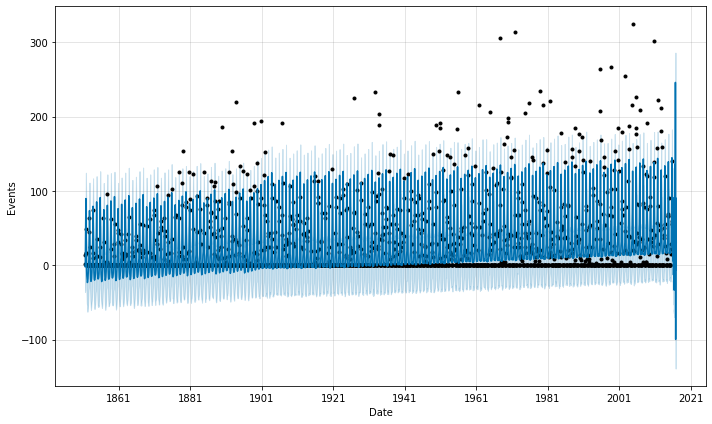

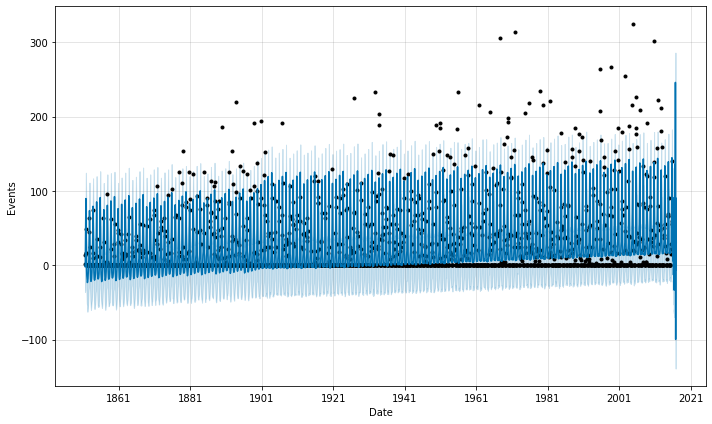

In [45]:
pd.plotting.register_matplotlib_converters()
m.plot(forecast,  xlabel='Date', ylabel='Events')

# type(forecast["ds"][0])

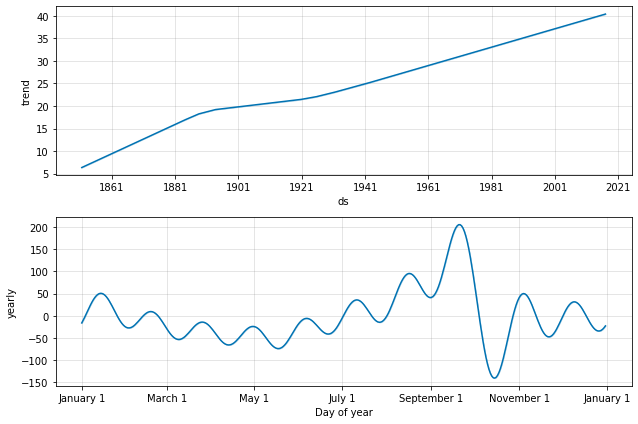

In [46]:
figure3 = m.plot_components(forecast)
